In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("PopulationData.csv")  # replace with the actual file name
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [6]:
print(df.shape)
print(df.columns.tolist()[:8])   # show first few column names
print(df['Indicator Name'].unique())   # should include "Population, total"
df.head()

(266, 69)
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963']
['Population, total']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [8]:
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
year_cols = [c for c in df.columns if c.isdigit()]   # e.g. '1960'..'2024'

df_long = df.melt(id_vars=id_vars, value_vars=year_cols,
                  var_name='Year', value_name='Population')

# convert types
df_long['Year'] = df_long['Year'].astype(int)
df_long['Population'] = pd.to_numeric(df_long['Population'], errors='coerce')

# drop missing population values
df_long = df_long.dropna(subset=['Population']).reset_index(drop=True)

df_long.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130075728.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0


In [9]:
YEAR = 2023
df_year = df_long[df_long['Year'] == YEAR].copy()
df_year = df_year.sort_values('Population', ascending=False)
df_year.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
16923,World,WLD,"Population, total",SP.POP.TOTL,2023,8.064977e+09
16768,IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2023,6.858864e+09
16804,Low & middle income,LMY,"Population, total",SP.POP.TOTL,2023,6.499219e+09
16820,Middle income,MIC,"Population, total",SP.POP.TOTL,2023,5.891445e+09
16767,IBRD only,IBD,"Population, total",SP.POP.TOTL,2023,4.952555e+09


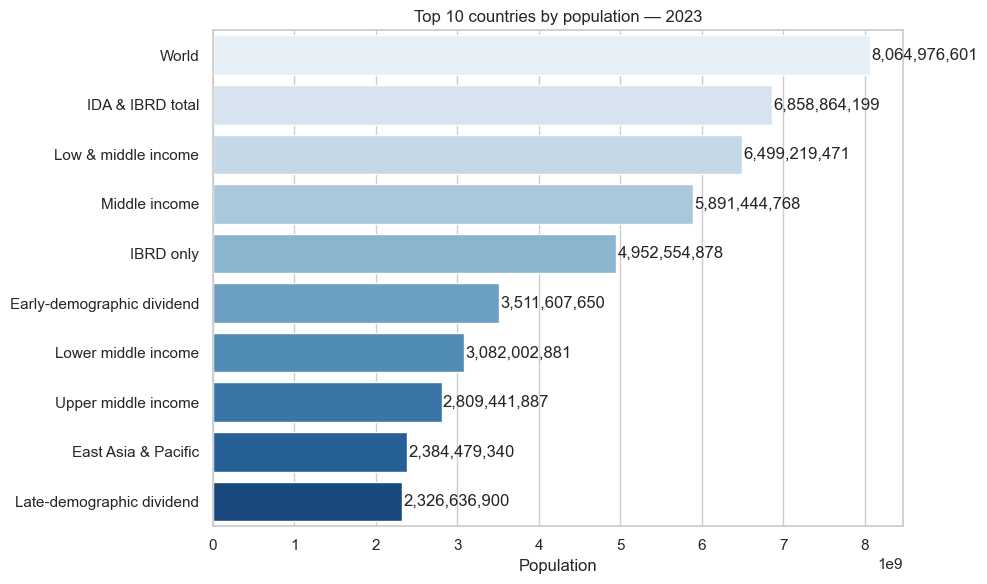

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

top_n = 10
# Sort in descending order so largest population comes first
top = df_year.head(top_n).sort_values('Population', ascending=False)

plt.figure(figsize=(10,6))

# Create gradient palette (darkest first)
palette = sns.color_palette("Blues", n_colors=top_n)

# Pass hue as 'Country Name' for palette application
ax = sns.barplot(
    x='Population',
    y='Country Name',
    data=top,
    hue='Country Name',
    palette=palette,
    legend=False
)

plt.title(f'Top {top_n} countries by population — {YEAR}')
plt.xlabel('Population')
plt.ylabel('')

# Annotate numbers on bars
max_pop = top['Population'].max()
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + max_pop*0.002,
        p.get_y() + p.get_height()/2,
        f'{int(width):,}',
        va='center'
    )

plt.tight_layout()
plt.savefig(f'top{top_n}_population_{YEAR}.png', dpi=300)
plt.show()



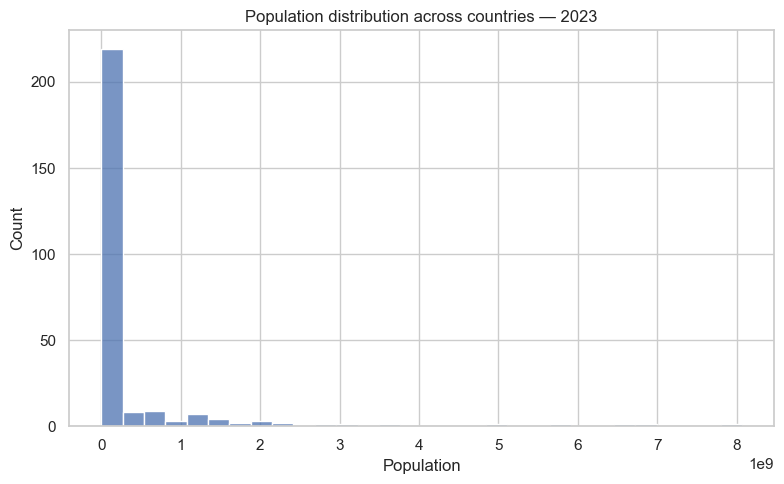

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df_year['Population'], bins=30)
plt.title(f'Population distribution across countries — {YEAR}')
plt.xlabel('Population')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'pop_hist_{YEAR}.png', dpi=300)
plt.show()



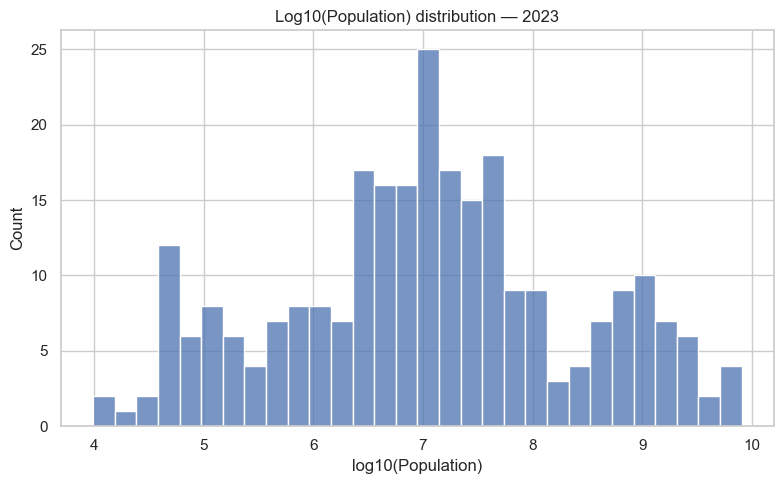

In [31]:
import numpy as np
plt.figure(figsize=(8,5))
sns.histplot(np.log10(df_year['Population']), bins=30)
plt.title(f'Log10(Population) distribution — {YEAR}')
plt.xlabel('log10(Population)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'pop_hist_log_{YEAR}.png', dpi=300)
plt.show()


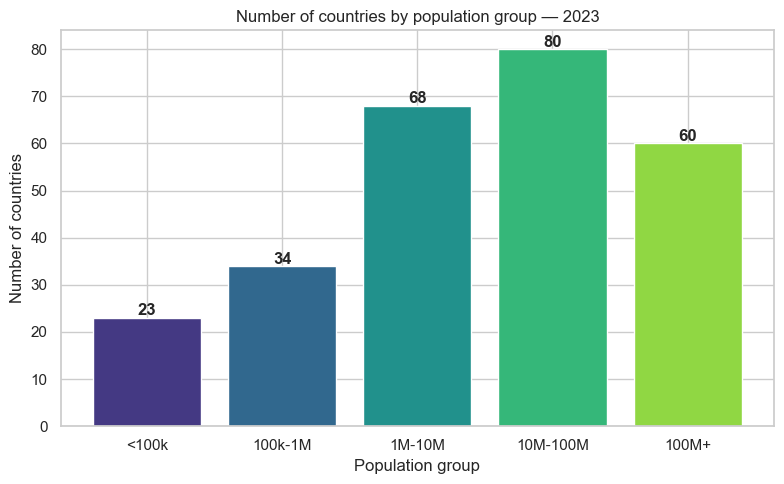

In [33]:
colors = sns.color_palette("viridis", len(group_counts))

plt.figure(figsize=(8,5))
bars = plt.bar(group_counts.index, group_counts.values, color=colors)

plt.title(f'Number of countries by population group — {YEAR}')
plt.xlabel('Population group')
plt.ylabel('Number of countries')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
             ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(f'pop_groups_{YEAR}_gradient.png', dpi=300)
plt.show()



In [18]:
# summary stats
print(df_year['Population'].describe())

# top 10 (already sorted)
top10 = df_year.head(10)[['Country Name','Population']]
bottom10 = df_year.tail(10)[['Country Name','Population']]

top10.to_csv(f'top10_pop_{YEAR}.csv', index=False)
bottom10.to_csv(f'bottom10_pop_{YEAR}.csv', index=False)


count    2.650000e+02
mean     3.284356e+08
std      1.012519e+09
min      9.816000e+03
25%      1.827816e+06
50%      1.064485e+07
75%      6.661761e+07
max      8.064977e+09
Name: Population, dtype: float64


In [ ]:
**Interpretation & Key Insights**
- In 2020, the top 3 most populous countries were **China (~1.41B)**, **India (~1.38B)**, and **United States (~331M)**.
- Median global population is relatively low compared to the maximum, with the histogram showing a **right-skewed distribution**.
- Outliers (China, India) dominate the scale, so a **log scale** was used.
- Limitations: Aggregated data; missing values for some territories; data year may vary.

In [20]:
import matplotlib.pyplot as plt

# Choose countries
countries = ['India', 'China', 'United States']

# Filter dataset for these countries
df_countries = df[df['Country Name'].isin(countries)]

# Set 'Country Name' as index for easier handling
df_countries = df_countries.set_index('Country Name')


In [21]:
# Extract only the year columns (1960–latest)
year_cols = [col for col in df_countries.columns if col.isdigit()]
df_countries = df_countries[year_cols]


In [22]:
# Transpose so years become rows
df_plot = df_countries.T
df_plot.index = df_plot.index.astype(int)  # Convert years to integers


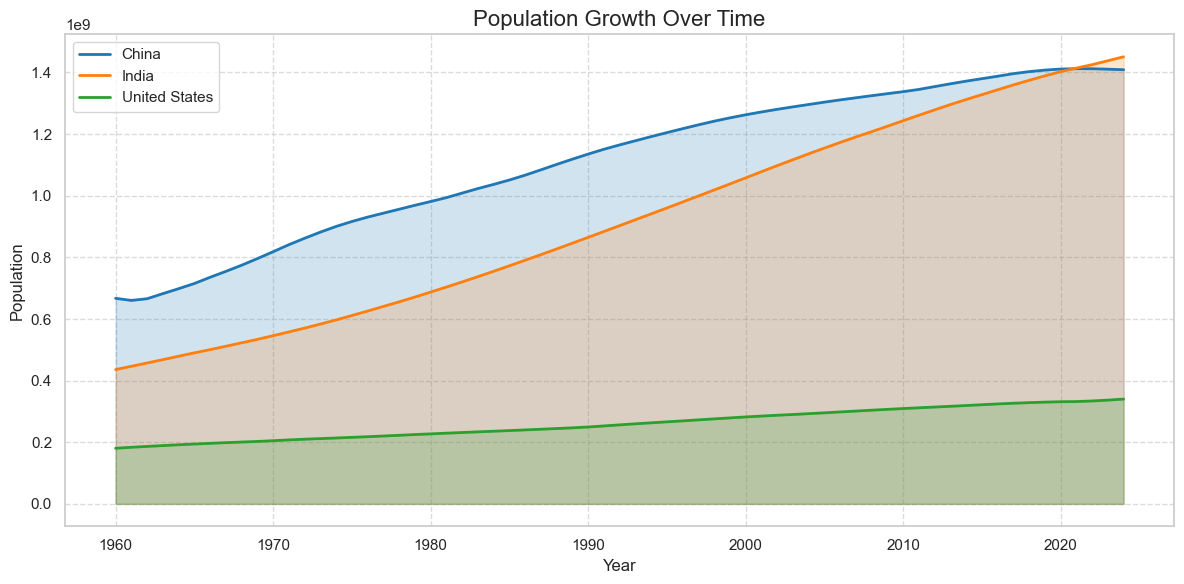

In [24]:
import numpy as np

plt.figure(figsize=(12,6))

# Custom color palette for 3 countries
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, country in enumerate(df_plot.columns):
    x = df_plot.index
    y = df_plot[country]

    # Plot the line
    plt.plot(x, y, color=colors[i], linewidth=2, label=country)

    # Add shaded area under the curve
    plt.fill_between(x, y, alpha=0.2, color=colors[i])

plt.title("Population Growth Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("population_growth_shaded_linechart.png", dpi=300)
plt.show()
